In [29]:
import json

In [30]:
# load json file to extend the node info
with open("../data/aggregated_data.json") as jr:
    cve_json = json.load(jr)



In [18]:
order = 0
for key, value in cve_json.items():
    while order >= 10:
        print(key)
        print(value)
        order += 1
        

In [15]:
list(cve_json.keys())[:20]

['org.jenkins-ci.main:cli:1.591',
 'org.elasticsearch:elasticsearch-hadoop:2.2.0-beta1',
 'org.jvnet.hudson.main:hudson-core:1.128',
 'net.sourceforge.htmlunit:neko-htmlunit:2.47.0',
 'org.jenkins-ci.main:cli:1.592',
 'org.jvnet.hudson.main:hudson-core:1.129',
 'net.sourceforge.htmlunit:neko-htmlunit:2.47.1',
 'org.springframework.boot:spring-boot-actuator:1.2.6.RELEASE',
 'org.jenkins-ci.main:cli:1.593',
 'org.jenkins-ci.main:cli:1.594',
 'org.jvnet.hudson.main:hudson-core:1.124',
 'org.xwiki.rendering:xwiki-rendering-syntax-xhtml:7.3-milestone-1',
 'org.jvnet.hudson.main:hudson-core:1.125',
 'org.jvnet.hudson.main:hudson-core:1.126',
 'org.jenkins-ci.main:cli:1.590',
 'org.jvnet.hudson.main:hudson-core:1.127',
 'org.jvnet.hudson.main:hudson-core:1.120',
 'org.jvnet.hudson.main:hudson-core:1.121',
 'org.jvnet.hudson.main:hudson-core:1.122',
 'org.jvnet.hudson.main:hudson-core:1.123']

In [12]:
len(list(cve_json.keys()))

97054

# Statistical Analysis Results

In [31]:
# define the mapping dict of ecosystem to packages
eco_dict = {
    "Maven": ["springframework", "jenkins-ci", 'apache', "sourceforge","craftercms",
              "wso2", "jvnet","puppycrawl","liferay","elasticsearch","undertow","graphql-java",
             "djl", "erudika"],
    "NPM": ["vue", "npm", "angular", "react"],
    "Ruby": ["rubygems"],
    "Pypi":["python"],
    
}

def eco_match(eco_dict, release_name):
    ''' match packages/releases to ecosystem
    :param eco_dict: the mapping dict to match release to its ecosystem
    :param release_name: the release name to match
    :return ecosystem name
    
    '''
    for key, values in eco_dict.items():
        for value in values:
            if value in release_name:
                return key
        # no match
    # print("there is no matched ecosystem for: ", release_name)
    # print("return default ecosystem")
    return "Maven"
    
    
    

In [32]:
release_list = list(cve_json.keys())
eco_system_dict = {}
eco_system = []
for key in key_list:
    res = eco_match(eco_dict, key)
    eco_system.append(res)
    if release not in eco_system_dict:
        eco_system_dict[release] = res


In [37]:
eco_cves_dict = {
    "Maven":[],
    "NPM":[],
    "Ruby":[],
    "Pypi":[],
}

for release, cves in cve_json.items():
    eco_cves_dict[eco_system_dict[release]].append(len(cves))
    
    

In [40]:
# calculate the mean CVEs for diverse ecosystems
from collections import Counter
import statistics

print(Counter(eco_system))
for eco, cve_len_list in eco_cves_dict.items():
    mean_num = statistics.mean(cve_len_list)
    print("The mean number of existing CVEs in ecosystem {} is: {}".format(eco, max_num))



Counter({'Maven': 95551, 'NPM': 1314, 'Ruby': 148, 'Pypi': 41})
The mean number of existing CVEs in ecosystem Maven is: 2
The mean number of existing CVEs in ecosystem NPM is: 2
The mean number of existing CVEs in ecosystem Ruby is: 2
The mean number of existing CVEs in ecosystem Pypi is: 2


In [38]:
# calculate the highest number of CVEs for diverse ecosystems
for eco, cve_len_list in eco_cves_dict.items():
    max_num = max(cve_len_list)
    print("The max number of existing CVEs in ecosystem {} is: {}".format(eco, max_num))


The max number of existing CVEs in ecosystem Maven is: 176
The max number of existing CVEs in ecosystem NPM is: 8
The max number of existing CVEs in ecosystem Ruby is: 7
The max number of existing CVEs in ecosystem Pypi is: 2


In [39]:
# calculate the median number of CVEs for diverse ecocystems
for eco, cve_len_list in eco_cves_dict.items():
    median_num = statistics.median(cve_len_list)
    print("The median number of existing CVEs in ecosystem {} is: {}".format(eco, median_num))


The median number of existing CVEs in ecosystem Maven is: 1
The median number of existing CVEs in ecosystem NPM is: 1.0
The median number of existing CVEs in ecosystem Ruby is: 6.0
The median number of existing CVEs in ecosystem Pypi is: 1


In [41]:
# visualize the statistic data in one chart
mean_cves = {
"Maven":2, "NPM":2, "Ruby":2, "Pypi":2
}

max_cves = {
"Maven": 176, "NPM": 8, "Ruby": 7, "Pypi": 2
}

med_cves= {
"Maven":1, "NPM":1, "Ruby":6, "Pypi":1
}

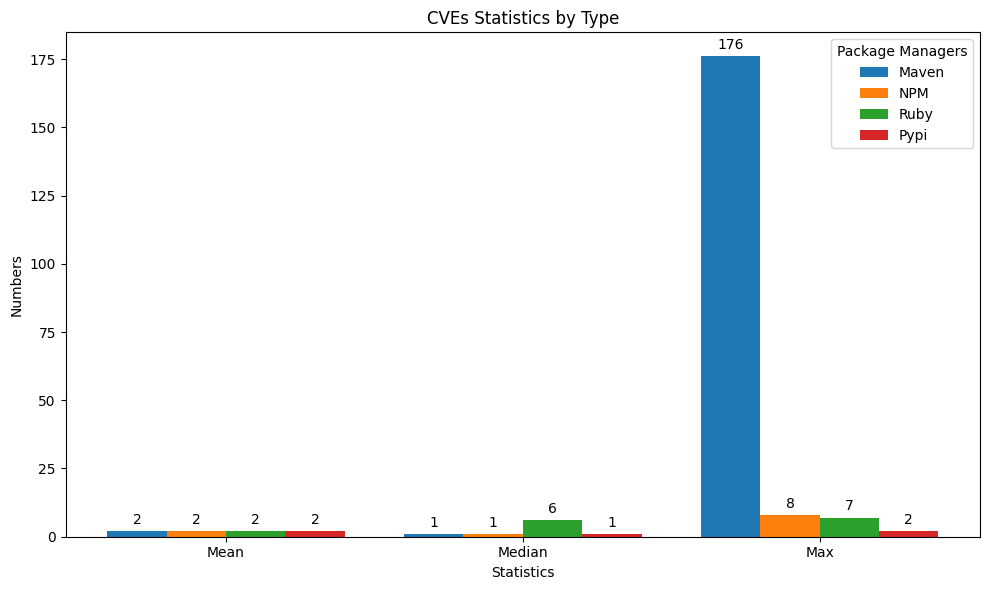

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Combine the data for plotting
categories = list(mean_cves.keys())
x_labels = ['Mean', 'Median', 'Max']
data = {
    'Maven': [mean_cves['Maven'], med_cves['Maven'], max_cves['Maven']],
    'NPM': [mean_cves['NPM'], med_cves['NPM'], max_cves['NPM']],
    'Ruby': [mean_cves['Ruby'], med_cves['Ruby'], max_cves['Ruby']],
    'Pypi': [mean_cves['Pypi'], med_cves['Pypi'], max_cves['Pypi']]
}

# Create a bar chart
bar_width = 0.2
x = np.arange(len(x_labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each set of data
for i, (label, values) in enumerate(data.items()):
    ax.bar(x + i * bar_width, values, bar_width, label=label)

# Adding labels and title
ax.set_xlabel('Statistics')
ax.set_ylabel('Numbers')
ax.set_title('CVEs Statistics by Type')
ax.set_xticks(x + bar_width * 1.5)  # Centering the x ticks
ax.set_xticklabels(x_labels)
ax.legend(title='Package Managers')

# Adding bar labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels for each set of bars
for i in range(len(data)):
    add_labels(ax.patches[i * len(x_labels):(i + 1) * len(x_labels)])

plt.tight_layout()
plt.show()